In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [13]:
data = pd.read_csv("cleaned_data.csv")

In [14]:
print(data.columns)

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_Stroke'],
      dtype='object')


In [15]:
# Map 'Yes' to 1 and 'No' to 0 in the 'Heart_Stroke' column
data['Heart_Stroke'] = data['Heart_Stroke'].map({'Yes': 1, 'No': 0})

# Label encoding for the 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Label encoding for binary categorical columns
label_encoder = LabelEncoder()
data['BPMeds'] = label_encoder.fit_transform(data['BPMeds'])
data['prevalentStroke'] = label_encoder.fit_transform(data['prevalentStroke'])
data['prevalentHyp'] = label_encoder.fit_transform(data['prevalentHyp'])

In [16]:
# One-hot encoding for the 'education' column
data = pd.get_dummies(data, columns=['education'], drop_first=True)

# Select features and target
X = data[['age', 'Gender', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'education_postgraduate', 'education_primaryschool', 'education_uneducated']]
y = data['Heart_Stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

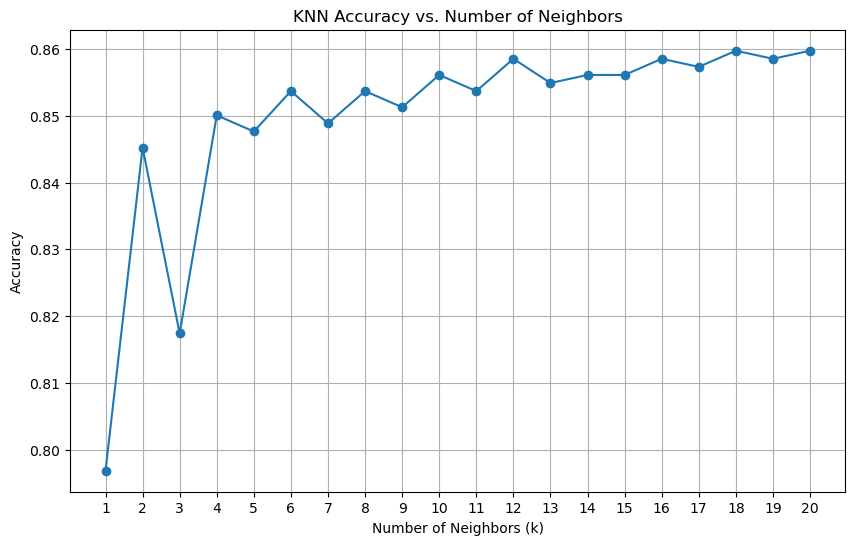

In [17]:
# Assuming you have X_train and y_train from your previous code

# Create lists to store accuracy values for different values of 'k'
k_values = []
accuracy_values = []

# Define a range of 'k' values to test
k_range = range(1, 21)  # You can adjust the range as needed

for k in k_range:
    # Initialize the KNN classifier with the current value of 'k'
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plot the accuracy values for different 'k' values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()


Confusion Matrix:
[[710   1]
 [115   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       711
           1       0.50      0.01      0.02       116

    accuracy                           0.86       827
   macro avg       0.68      0.50      0.47       827
weighted avg       0.81      0.86      0.80       827



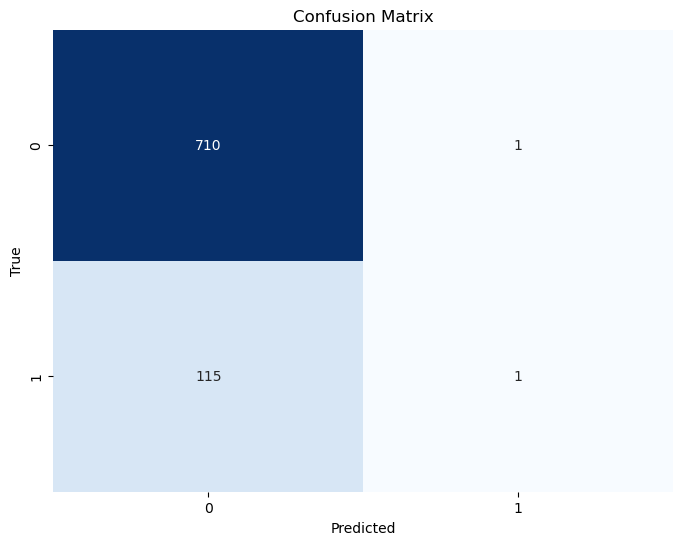

In [18]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# You can also create additional visualizations, such as a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
# Calculate accuracy and store it
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 85.97%


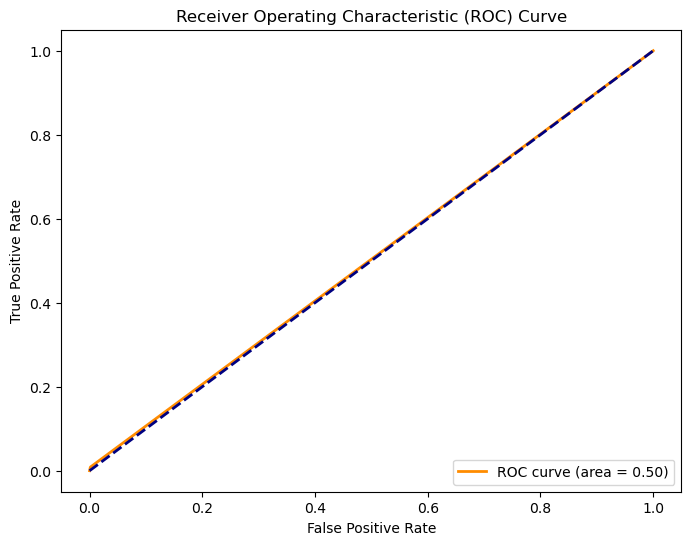

In [20]:
# Calculate the false positive rate, true positive rate, and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

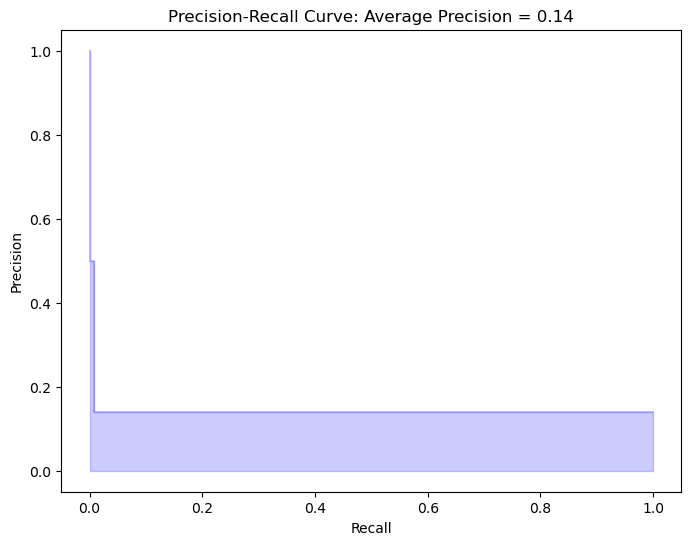

In [21]:
# Calculate precision, recall, and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Average Precision = {:.2f}'.format(average_precision))
plt.show()